In [109]:
import pandas as pd
import numpy as np
import matplotlib

# Read a comma-separated values (csv) file into DataFrame.

The data folder contains a file named "newark_tree_data.csv". Read this file into a dataframe.


resources:
* [Pandas read csv docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [110]:
newark_tree_data = pd.read_csv("data/newark_tree_data.csv")

In [111]:
newark_tree_data.head()


,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
0,11.0,Elan Park,Elan Park,2,Blue Hen Rg,11.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,40,0-5%,0-5%
1,12.0,Elan Park,Elan Park,2,Blue Hen Rg,12.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,41,0-5%,0-5%
2,13.0,Elan Park,Elan Park,2,Blue Hen Rg,13.0,Front,False,"pine, eastern white",Pinus strobus,...,False,False,False,False,True,False,No,54,0-5%,6-10%
3,14.0,Elan Park,Elan Park,2,Blue Hen Rg,14.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,57,11-15%,26-30%
4,15.0,Elan Park,Elan Park,2,Blue Hen Rg,15.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,55,11-15%,21-25%


In [112]:
len(newark_tree_data.columns)


54

In [113]:
newark_tree_data.columns

Index(['ID', 'ON', 'AREA', 'ADDRESS', 'STREET', 'SITE', 'SIDE', 'ASSIGNED',
       'COMMON', 'BOTANICAL', 'CULTIVAR', 'DBH', 'REMOVAL', 'STEMS', 'COND',
       'MAINTPRIM', 'OBSERVE', 'INSPECT', 'LOCATION', 'NOTES', 'DATE', 'TIME',
       'STAFF', 'XCOORD', 'YCOORD', 'FAILURE', 'LIKELIHOOD', 'TARGET',
       'CONSEQ', 'RISK', 'UNIQUEID', 'EDITTIME', 'SPREAD', 'HEIGHT',
       'CLEARANCE', 'DECAYCL', 'DECAYT', 'DECAYRF', 'DAMC', 'DAMT', 'DAMRF',
       'CAVITYCL', 'CAVITYT', 'CAVITYRF', 'IMPROPMULC', 'IMPROPPRUN',
       'NUTRIENTD', 'PEST', 'GIRDLING', 'STRESS', 'OHUTILITY', 'TOP_HEIGHT',
       'CROWN_M', 'CROWN_DIE'],
      dtype='object')

Upon reviewing the columns of the DataFrame, we see that there is already a column named ID that is well suited for an index column.  

For the purposes of this lab, we are only going to need a few of the available attributes. The attributes we wish to keep are listed below:
* ID
* UNIQUEID
* COMMON
* BOTANICAL
* COND
* RISK
* HEIGHT

Let's provide the index_col and the usecols args when we invoke the read_csv method.

In [114]:
new_df = pd.read_csv("data/newark_tree_data.csv", index_col=['ID'], usecols=['ID',
 'UNIQUEID', 'COMMON', 'BOTANICAL', 'COND', 'RISK','HEIGHT'])

In [115]:
new_df.head


<bound method NDFrame.head of                       COMMON                BOTANICAL       COND RISK  \
ID                                                                      
11.0     arborvitae, eastern       Thuja occidentalis       Good  Low   
12.0     arborvitae, eastern       Thuja occidentalis  Very Good  Low   
13.0     pine, eastern white            Pinus strobus       Good  Low   
14.0    whitecedar, Atlantic   Chamaecyparis thyoides       Fair  Low   
15.0    whitecedar, Atlantic   Chamaecyparis thyoides       Fair  Low   
...                      ...                      ...        ...  ...   
4189.0   Japanese pagodatree  Styphnolobium japonicum       Good  Low   
4190.0         oak, sawtooth       Quercus acutissima       Good  Low   
4191.0   Japanese pagodatree  Styphnolobium japonicum       Fair  Low   
4192.0    sycamore, American    Platanus occidentalis       Good  Low   
4193.0            ash, white       Fraxinus americana       Fair  Low   

                 UNI

The data narritive specifies that 4,193 sites were inventoried. Use the DataFrame shape attribute to verify the number of rows.

In [116]:
new_df.shape

(4193, 6)

Let's look at the distribution of data for the HEIGHT attribute.

In [117]:
min(new_df['HEIGHT'])

0

In [118]:
max(new_df['HEIGHT'])


140

In [119]:
new_df['HEIGHT'].describe()


count    4193.000000
mean       55.311472
std        36.293489
min         0.000000
25%        23.000000
50%        50.000000
75%        86.000000
max       140.000000
Name: HEIGHT, dtype: float64

# Plot a histogram using the HEIGHT attribute. 

resources:
* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
* [Pandas Series Hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist)

In [120]:
%matplotlib inline


<AxesSubplot:ylabel='Frequency'>

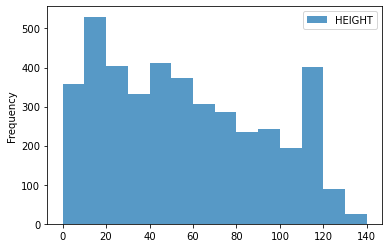

In [121]:
# Create a histogram using the HEIGHT attribute here
new_df.plot.hist(bins=14, alpha=0.75)


The data narrative specifies the following:
"A total of 4,193 sites were inventoried, including 4,087 trees, 100 stumps, and 6 vacant planting sites"

Earlier, we were able to validate the total number of entries in the DataFrame. Let's now dig in a bit deeper and validate the stumps and vacant planting sites.

In [122]:
len(new_df[new_df['COMMON']=='stump'])

100

In [123]:
# How many entries are vacant sites

#len(new_df[new_df['COMMON']=='vacant site, large'])

len(new_df[new_df['COMMON'].str.startswith('vac')])



6

In [124]:
# Do these number add up?

len(new_df) - len(new_df[new_df['COMMON'].str.startswith('vac')]) - len(new_df[new_df['COMMON'].str.startswith('stump')])





4087

# Plot a bar graph using the COND attribute.

resources:
* [Pandas Series Bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html#pandas.Series.plot.bar)

In [125]:
# How can we determine all of the possible values describing the condition of a tree and their associated counts?

new_df_bar = new_df[['COMMON', 'COND']].groupby('COND').count()



In [126]:
new_df_bar

,COMMON
COND,
Critical,74
Dead,218
Excellent,163
Fair,1598
Good,1168
Poor,402
Very Good,381
Very Poor,83


In [127]:
new_index = ['Dead', 'Critical', 'Very Poor', 'Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

In [128]:
# Were these already in the order you would want them to be in order for a graph to make sense? 
# If not, reorder  the Series.
new_df_reindexed = new_df_bar.reindex(new_index)


In [129]:
new_df_reindexed = new_df_reindexed.rename(columns={'COMMON':'COUNT'})

In [130]:
new_df_reindexed

,COUNT
COND,
Dead,218
Critical,74
Very Poor,83
Poor,402
Fair,1598
Good,1168
Very Good,381
Excellent,163


<AxesSubplot:xlabel='COND'>

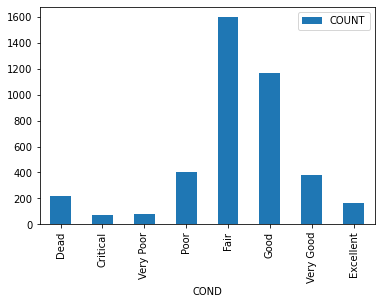

In [131]:
# Plot the Series here
new_df_reindexed.plot.bar()

In [132]:
# How many entries have missing values for the COND attribute? Why are these values missing?
len(new_df.index)-new_df_reindexed['COUNT'].sum()

106

# Plot a pie chart using the RISK attribute.

resources:
* [Pandas Series Pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html#pandas.Series.plot.pie)
* [matplotlib pie chart docs](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

In [133]:
# How can we determine all of the possible values describing the RISK associated with each tree
# along with the corresponding row counts?
new_df_pie = new_df[['COMMON', 'RISK']].groupby('RISK').count()


In [134]:
new_df_pie

,COMMON
RISK,
High,13
Low,3833
Moderate,241


In [137]:
# Create an array containing the colors green, yellow, and orange
# When we create our pie chart, the colors should be associated with the attributes according to the specifications below:
# Green -> Low
# Yellow -> Moderate
# Orange -> High
color_names = pd.Series(['Orange', 'Yellow', 'Green'])


array([<AxesSubplot:ylabel='COMMON'>], dtype=object)

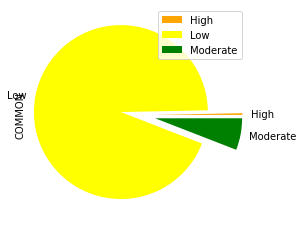

In [142]:
# Plot the pie chart here

new_df_pie.plot.pie(subplots = True,colors=color_names, explode = [.2,.2,.2])

In [141]:
# How many entries have missing values for the RISK attribute? Why are these values missing?
len(new_df.index)-new_df_pie['COMMON'].sum()

#Missing values : Stumps and vacant sites have no risk defined

106

# Indexing

In [144]:
# Display row by position 1

new_df.iloc[0]


COMMON       arborvitae, eastern
BOTANICAL     Thuja occidentalis
COND                        Good
RISK                         Low
UNIQUEID       LM 20150929141218
HEIGHT                        40
Name: 11.0, dtype: object

In [145]:
# Display row by label 1
new_df.loc[1]


COMMON              locust, black
BOTANICAL    Robinia pseudoacacia
COND                         Poor
RISK                     Moderate
UNIQUEID        LM 20150929131426
HEIGHT                         43
Name: 1.0, dtype: object